In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
df=pd.read_csv("../data/keri_churn_data", sep=chr(1), header=None)

C:\Users\FNasiri\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,11,13,15,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
header_file = open('../data/header.csv', 'r') 
col_headers=header_file.read()
header_file.close()
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64')

In [4]:
col_headers=col_headers.replace('\n','')

In [5]:
col_headers=col_headers.split(sep=',')

In [6]:
len(col_headers)

29

In [7]:
temp_dict={}

for i in range(0,len(col_headers)):
    temp_dict[i]=col_headers[i]

In [8]:
temp_dict

{0: 'csr_year_varchar',
 1: 'csr_month_varchar',
 2: 'idcampaign_master_varchar',
 3: 'idcampaign_varchar',
 4: 'idadvertiser_varchar',
 5: 'advertiser_name_varchar',
 6: 'advertiser_city_varchar',
 7: 'advertiser_state_varchar',
 8: 'advertiser_zipcode_varchar',
 9: 'idbusinesscategory_varchar',
 10: 'business_category_varchar',
 11: 'idbusinesssubcategory_varchar',
 12: 'business_subcategory_varchar',
 13: 'idoffer_varchar',
 14: 'product_varchar',
 15: 'stop_request_varchar',
 16: 'adv_change_type_varchar',
 17: 'campaign_budget_varchar',
 18: 'spend_varchar',
 19: 'clicks_varchar',
 20: 'impressions_varchar',
 21: 'calls_varchar',
 22: 'qualified_calls_varchar',
 23: 'emails_varchar',
 24: 'cvt_varchar',
 25: 'qualified_web_events_varchar',
 26: 'businessuser_varchar',
 27: 'system_varchar',
 28: 'advtrans_varchar'}

In [9]:
df.shape

(3656037, 29)

In [9]:
df.rename(columns=temp_dict, inplace=True )

In [10]:
df.head()

,csr_year_varchar,csr_month_varchar,idcampaign_master_varchar,idcampaign_varchar,idadvertiser_varchar,advertiser_name_varchar,advertiser_city_varchar,advertiser_state_varchar,advertiser_zipcode_varchar,idbusinesscategory_varchar,...,clicks_varchar,impressions_varchar,calls_varchar,qualified_calls_varchar,emails_varchar,cvt_varchar,qualified_web_events_varchar,businessuser_varchar,system_varchar,advtrans_varchar
0,2010,5,518673,518673,84481,Orlando Magic,Orlando,FL,32810,30,...,277,2771946,9,1,0,0,0,5,6,0
1,2010,4,518675,518675,84481,Orlando Magic,Orlando,FL,32810,30,...,49,55698,8,1,0,0,0,8,4,0
2,2010,5,518675,518675,84481,Orlando Magic,Orlando,FL,32810,30,...,204,262336,7,0,0,0,0,4,2,0
3,2010,4,518676,518676,84546,Elite Janitorial Maintenance Supply Inc,Saint Louis,MO,63114,10,...,86,20823,6,4,0,3,3,7,101,0
4,2010,5,518676,518676,84546,Elite Janitorial Maintenance Supply Inc,Saint Louis,MO,63114,10,...,38,6987,3,0,0,2,2,0,79,0


In [11]:
df.isna().sum()

csr_year_varchar                      0
csr_month_varchar                     0
idcampaign_master_varchar             0
idcampaign_varchar                    0
idadvertiser_varchar                  0
advertiser_name_varchar               0
advertiser_city_varchar               0
advertiser_state_varchar              0
advertiser_zipcode_varchar            0
idbusinesscategory_varchar            0
business_category_varchar             0
idbusinesssubcategory_varchar         0
business_subcategory_varchar        711
idoffer_varchar                       0
product_varchar                       0
stop_request_varchar             565094
adv_change_type_varchar               0
campaign_budget_varchar               0
spend_varchar                         0
clicks_varchar                        0
impressions_varchar                   0
calls_varchar                         0
qualified_calls_varchar               0
emails_varchar                        0
cvt_varchar                           0


In [13]:
#df.dropna(axis=0, inplace=True)


#df.shape

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656037 entries, 0 to 3656036
Data columns (total 29 columns):
csr_year_varchar                 int64
csr_month_varchar                int64
idcampaign_master_varchar        int64
idcampaign_varchar               int64
idadvertiser_varchar             int64
advertiser_name_varchar          object
advertiser_city_varchar          object
advertiser_state_varchar         object
advertiser_zipcode_varchar       object
idbusinesscategory_varchar       object
business_category_varchar        object
idbusinesssubcategory_varchar    object
business_subcategory_varchar     object
idoffer_varchar                  object
product_varchar                  object
stop_request_varchar             object
adv_change_type_varchar          object
campaign_budget_varchar          object
spend_varchar                    object
clicks_varchar                   object
impressions_varchar              object
calls_varchar                    object
qualified_ca

In [15]:
df=df.apply(lambda x: x.replace('\\N', 'CHECKING'))

In [16]:
df.isin(['CHECKING']).sum()

csr_year_varchar                   0
csr_month_varchar                  0
idcampaign_master_varchar          0
idcampaign_varchar                 0
idadvertiser_varchar               0
advertiser_name_varchar          966
advertiser_city_varchar          966
advertiser_state_varchar         966
advertiser_zipcode_varchar       966
idbusinesscategory_varchar       966
business_category_varchar        966
idbusinesssubcategory_varchar    966
business_subcategory_varchar     966
idoffer_varchar                  966
product_varchar                  966
stop_request_varchar             966
adv_change_type_varchar          966
campaign_budget_varchar          966
spend_varchar                    966
clicks_varchar                   966
impressions_varchar              966
calls_varchar                    966
qualified_calls_varchar          966
emails_varchar                   966
cvt_varchar                      966
qualified_web_events_varchar     966
businessuser_varchar             966
s

In [17]:
# Truns out '\\N' is the end of line character brought in by Qubole

In [18]:
df.shape

(3656037, 29)

In [19]:
string_cols=[]
for col in df.columns:
    if df[col].dtypes == 'O':
        string_cols.append(col)
    

In [20]:
for col in string_cols: # Remove the \\N s
    df=df[df[col] != 'CHECKING']

In [21]:
df.shape

(3655071, 29)

In [22]:
def convert_to_numbers(input_var):
    if type(input_var) == str:
        #print(type(input_var))
        try:
            return float(input_var)
        except:
            return input_var
    else:
        return input_var

In [23]:
for col in df.columns:
    df[col]=df[col].apply(lambda x: convert_to_numbers(x))

In [24]:
df.dtypes

csr_year_varchar                   int64
csr_month_varchar                  int64
idcampaign_master_varchar          int64
idcampaign_varchar                 int64
idadvertiser_varchar               int64
advertiser_name_varchar           object
advertiser_city_varchar           object
advertiser_state_varchar          object
advertiser_zipcode_varchar        object
idbusinesscategory_varchar       float64
business_category_varchar         object
idbusinesssubcategory_varchar    float64
business_subcategory_varchar      object
idoffer_varchar                  float64
product_varchar                   object
stop_request_varchar             float64
adv_change_type_varchar           object
campaign_budget_varchar          float64
spend_varchar                    float64
clicks_varchar                   float64
impressions_varchar              float64
calls_varchar                    float64
qualified_calls_varchar          float64
emails_varchar                   float64
cvt_varchar     

In [25]:
df.isna().sum()

csr_year_varchar                      0
csr_month_varchar                     0
idcampaign_master_varchar             0
idcampaign_varchar                    0
idadvertiser_varchar                  0
advertiser_name_varchar               0
advertiser_city_varchar               0
advertiser_state_varchar              0
advertiser_zipcode_varchar            0
idbusinesscategory_varchar            0
business_category_varchar             0
idbusinesssubcategory_varchar         0
business_subcategory_varchar        711
idoffer_varchar                       0
product_varchar                       0
stop_request_varchar             565094
adv_change_type_varchar               0
campaign_budget_varchar               0
spend_varchar                         0
clicks_varchar                        0
impressions_varchar                   0
calls_varchar                         0
qualified_calls_varchar               0
emails_varchar                        0
cvt_varchar                           0


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
csr_year_varchar,3655071.0,2.013243e+03,2.620681,2009.0,2011.00,2013.00,2015.00,2.018000e+03
csr_month_varchar,3655071.0,6.420375e+00,3.461385,1.0,3.00,6.00,9.00,1.200000e+01
idcampaign_master_varchar,3655071.0,1.043370e+06,660059.412509,368.0,479146.00,923253.00,1564917.00,2.522502e+06
idcampaign_varchar,3655071.0,1.382582e+06,647006.019480,61028.0,823001.00,1361565.00,1949512.00,2.523052e+06
idadvertiser_varchar,3655071.0,1.126115e+05,52940.063264,14.0,73747.00,114191.00,159027.00,2.344880e+05
idbusinesscategory_varchar,3655071.0,1.714201e+01,8.406552,1.0,10.00,21.00,23.00,3.200000e+01
idbusinesssubcategory_varchar,3655071.0,1.739670e+03,841.700930,0.0,1005.00,2110.00,2301.00,3.301000e+03
idoffer_varchar,3655071.0,3.063330e+02,589.379658,1.0,1.00,1.00,2.00,2.029000e+03
stop_request_varchar,3089977.0,1.379848e-02,0.116654,0.0,0.00,0.00,0.00,1.000000e+00
campaign_budget_varchar,3655071.0,1.259926e+03,2355.481195,0.0,500.00,888.00,1500.00,3.500000e+05


In [27]:
df.to_csv("../data/keri_churn_data_tidy.csv", index=None)

In [49]:
df.reset_index(drop=True, inplace=True)

In [43]:
df.idadvertiser_varchar.unique()

array([    14,     28,     40, ..., 234442, 234479, 234488])

In [44]:
df.sort_values(by=['idadvertiser_varchar'], inplace=True)

In [50]:
df.shape

(3655071, 29)

In [53]:
df['time_stamp']=df.csr_year_varchar*100+df.csr_month_varchar

In [ ]:
column_names=df.columns
fig, axes = plt.subplots(5, 6,figsize=(15,12))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axes = axes.ravel()
for i in range(1,df.shape[1]-1):
    axes[i-1].hist(df.iloc[:,i])
    axes[i-1].set_title(column_names[i-1],size=12)

# IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [61]:
df.columns

Index(['csr_year_varchar', 'csr_month_varchar', 'idcampaign_master_varchar',
       'idcampaign_varchar', 'idadvertiser_varchar', 'advertiser_name_varchar',
       'advertiser_city_varchar', 'advertiser_state_varchar',
       'advertiser_zipcode_varchar', 'idbusinesscategory_varchar',
       'business_category_varchar', 'idbusinesssubcategory_varchar',
       'business_subcategory_varchar', 'idoffer_varchar', 'product_varchar',
       'stop_request_varchar', 'adv_change_type_varchar',
       'campaign_budget_varchar', 'spend_varchar', 'clicks_varchar',
       'impressions_varchar', 'calls_varchar', 'qualified_calls_varchar',
       'emails_varchar', 'cvt_varchar', 'qualified_web_events_varchar',
       'businessuser_varchar', 'system_varchar', 'advtrans_varchar',
       'time_stamp'],
      dtype='object')

In [60]:
ids=df.idadvertiser_varchar.unique()
for in
num_col=['csr_year_varchar', 'csr_month_varchar', 'idcampaign_master_varchar',
       'idcampaign_varchar', 'idadvertiser_varchar', 'advertiser_name_varchar',
       'advertiser_city_varchar', 'advertiser_state_varchar',
       'advertiser_zipcode_varchar', 'idbusinesscategory_varchar',
       'business_category_varchar', 'idbusinesssubcategory_varchar',
       'business_subcategory_varchar', 'idoffer_varchar', 'product_varchar',
       'stop_request_varchar', 'adv_change_type_varchar',
       'campaign_budget_varchar', 'spend_varchar', 'clicks_varchar',
       'impressions_varchar', 'calls_varchar', 'qualified_calls_varchar',
       'emails_varchar', 'cvt_varchar', 'qualified_web_events_varchar',
       'businessuser_varchar', 'system_varchar', 'advtrans_varchar',
       'time_stamp']


In [ ]:
for ad_id in ids:
    temp=df[df.idadvertiser_varchar == ad_id].sort_values(by=['time_stamp'])
    

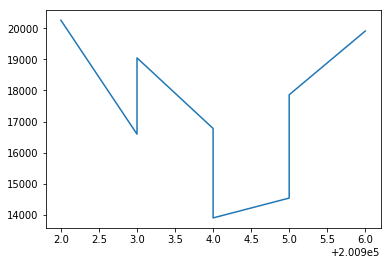

In [58]:
plt.plot(temp.time_stamp, temp.impressions_varchar)

# IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [33]:
df.groupby(['idadvertiser_varchar']).mean()

,csr_year_varchar,csr_month_varchar,idcampaign_master_varchar,idcampaign_varchar,idbusinesscategory_varchar,idbusinesssubcategory_varchar,idoffer_varchar,stop_request_varchar,campaign_budget_varchar,spend_varchar,clicks_varchar,impressions_varchar,calls_varchar,qualified_calls_varchar,emails_varchar,cvt_varchar,qualified_web_events_varchar,businessuser_varchar,system_varchar,advtrans_varchar
idadvertiser_varchar,,,,,,,,,,,,,,,,,,,,
14,2009.000000,4.000000,3.004640e+05,3.250810e+05,5.0,522.000000,1.000000,0.000000,710.000000,355.000000,121.125000,17361.750000,29.000000,17.125000,0.500000,21.000000,1.500000,4.375000,76.750000,0.000000
28,2009.225806,5.612903,1.276855e+05,3.899545e+05,23.0,2338.000000,1.000000,0.000000,412.500000,203.163871,170.322581,9782.000000,14.903226,5.193548,0.500000,282.467742,1.887097,0.200000,61.727273,0.064516
40,2009.192308,5.653846,5.341000e+03,3.891967e+05,13.0,1300.000000,1.000000,0.000000,1500.000000,750.315385,1046.500000,122132.730769,19.730769,7.538462,3.000000,102.076923,8.192308,0.625000,39.375000,0.038462
43,2009.000000,2.777778,7.736200e+04,3.059200e+05,10.0,1008.000000,1.000000,0.000000,750.000000,359.740000,261.888889,13642.777778,7.000000,4.000000,0.222222,9.444444,0.111111,0.000000,62.555556,0.000000
103,2011.169643,6.116071,4.221275e+05,8.686468e+05,16.0,1619.000000,1.000000,0.009091,3553.571429,1776.281339,243.062500,7508.107143,23.812500,13.151786,1.732143,54.892857,0.000000,1.090909,57.800000,0.000000
124,2009.000000,6.260870,3.680000e+02,3.638350e+05,8.0,826.000000,1.000000,0.000000,1110.000000,565.039130,79.913043,12110.391304,10.739130,5.782609,0.217391,40.956522,6.217391,0.260870,82.260870,0.000000
137,2013.284360,6.362559,1.127226e+04,1.399048e+06,30.0,3028.000000,1.000000,0.000000,300.000000,135.650118,130.909953,2978.369668,12.687204,4.037915,0.606635,52.274882,0.492891,0.162963,37.432099,0.000000
138,2013.036036,6.243243,8.443043e+05,1.344142e+06,30.0,3028.000000,1.000000,0.000000,300.000000,122.019459,146.603604,4077.873874,2.468468,0.513514,0.603604,38.657658,0.180180,0.352381,44.123810,0.000000
369,2011.758389,6.087248,3.582070e+04,1.023484e+06,22.0,2214.187919,1.000000,0.000000,120.000000,60.380805,42.234899,2642.959732,1.523490,0.268456,1.080537,36.644295,0.000000,0.328671,40.629371,0.000000
